In [5]:
%matplotlib inline

In [6]:
import sys, os, csv, datetime
import numpy as np
import matplotlib.pyplot as plt
parent_directory = os.path.split(os.getcwd())[0]
src_directory = os.path.join(parent_directory, 'src')
data_directory = os.path.join('/scratch/groups/gracegao', 'Google_GNSS_data')
ephemeris_data_directory = os.path.join(data_directory, 'ephemeris')
sys.path.insert(0, src_directory)
base_samples_save_path = os.path.join(data_directory, "samples")

In [113]:
ls_samples = np.load(os.path.join(base_samples_save_path, "9_15_basic_ls_small"+".npy"))
hdls_samples = np.load(os.path.join(base_samples_save_path, "9_15_hdls"+".npy"))
hdls_seq_samples = [np.load(os.path.join(base_samples_save_path, "9_15_hdls_seq_l"+str(i)+""+".npy")) for i in range(6)]
fc_samples = np.load(os.path.join(base_samples_save_path, "9_15_fc"+".npy"))
settf_samples = np.load(os.path.join(base_samples_save_path, "9_15_settf"+".npy"))

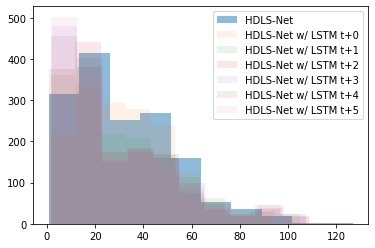

In [114]:
# plt.hist(np.linalg.norm(settf_samples, axis=-1), alpha=0.5, label="Set Transformer")
# plt.hist(np.linalg.norm(ls_samples, axis=-1), alpha=0.5, label="Least Squares")
plt.hist(np.linalg.norm(hdls_samples, axis=-1), alpha=0.5, label="HDLS-Net")
for i in range(6):
    plt.hist(np.linalg.norm(hdls_seq_samples[i], axis=-1), alpha=0.1, label="HDLS-Net w/ LSTM t+"+str(i))
# plt.hist(np.linalg.norm(fc_samples, axis=-1), alpha=0.5, label="Fully Connected")
plt.legend()

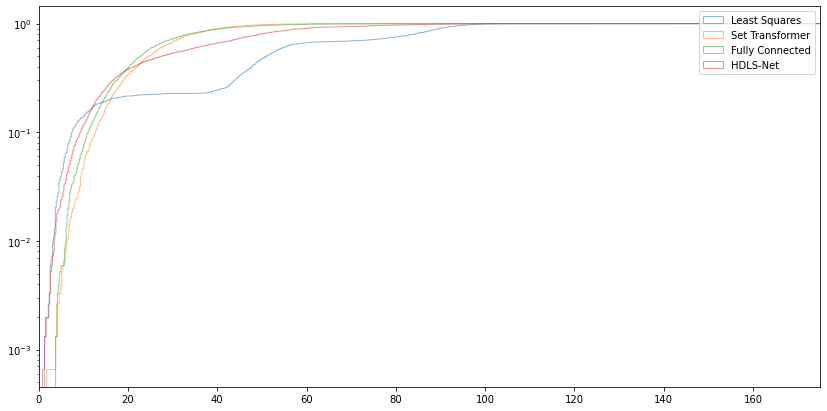

In [115]:
plt.figure(figsize=(14, 7))
plt.yscale('log')
plt.xlim((0, 175))

tmp_samples = np.linalg.norm(ls_samples, axis=-1)
tmp_samples[-1] = 200
plt.hist(tmp_samples, density=True, cumulative=True,
         histtype='step', bins=1000, alpha=0.5, label="Least Squares")

tmp_samples = np.linalg.norm(settf_samples, axis=-1)
tmp_samples[-1] = 200
plt.hist(tmp_samples, density=True, cumulative=True,
         histtype='step', bins=1000, alpha=0.5, label="Set Transformer")

tmp_samples = np.linalg.norm(fc_samples, axis=-1)
tmp_samples[-1] = 200
plt.hist(tmp_samples, density=True, cumulative=True,
         histtype='step', bins=1000, alpha=0.5, label="Fully Connected")


tmp_samples = np.linalg.norm(hdls_samples, axis=-1)
tmp_samples[-1] = 200
plt.hist(tmp_samples, density=True, cumulative=True,
         histtype='step', bins=1000, alpha=0.5, label="HDLS-Net")

plt.legend()

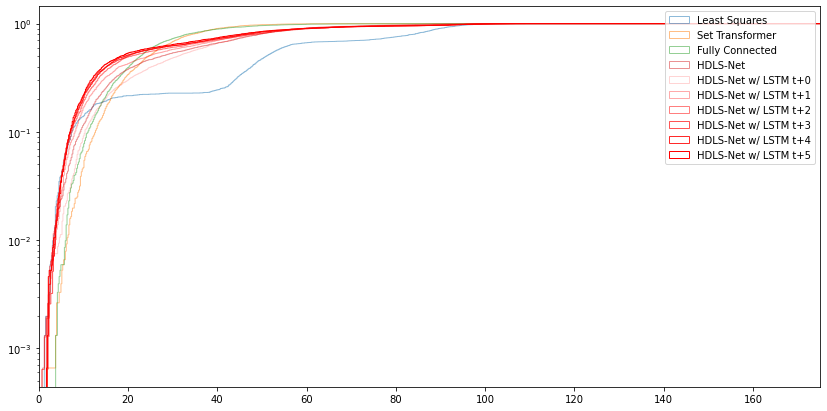

In [136]:
plt.figure(figsize=(14, 7))
plt.yscale('log')
plt.xlim((0, 175))
# plt.xlim((3, 35))
# plt.ylim((1e-2, 0.6))

tmp_samples = np.linalg.norm(ls_samples, axis=-1)
tmp_samples[-1] = 200
plt.hist(tmp_samples, density=True, cumulative=True,
         histtype='step', bins=1000, alpha=0.5, label="Least Squares")

tmp_samples = np.linalg.norm(settf_samples, axis=-1)
tmp_samples[-1] = 200
plt.hist(tmp_samples, density=True, cumulative=True,
         histtype='step', bins=1000, alpha=0.5, label="Set Transformer")

tmp_samples = np.linalg.norm(fc_samples, axis=-1)
tmp_samples[-1] = 200
plt.hist(tmp_samples, density=True, cumulative=True,
         histtype='step', bins=1000, alpha=0.5, label="Fully Connected")

tmp_samples = np.linalg.norm(hdls_samples, axis=-1)
tmp_samples[-1] = 200
plt.hist(tmp_samples, density=True, cumulative=True,
         histtype='step', bins=1000, alpha=0.5, label="HDLS-Net")

for i in range(6):
    tmp_samples = np.linalg.norm(hdls_seq_samples[i], axis=-1)
    tmp_samples[-1] = 200
    plt.hist(tmp_samples, density=True, cumulative=True,
             histtype='step', bins=1000, alpha=(i+1)/6, label="HDLS-Net w/ LSTM t+"+str(i), color='r')

plt.legend()